### Algorithm applied : 
+ NLP(Natural Language Processing)

### Project Objective : 
+ To develop a deep learning algorithm to detect different types of emotion contained in a collection of English sentences or a large paragraph.   

# Day- 02 : Perform exploratory data on text

+ Importing datasets
+ Concatenating all the Datasets (Train, Test, Validation)
+ Checking empty or null datasets
+ Removing the duplicated data
+ Counting emotions
+ Counting the number of characters in the text

### Importing datasets
+ Collection of english text, sentences and large paragraphs covering emotions like happy, sad, expressing love, anger and surprise.
+ https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=test.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Concatenating all the Datasets (Train, Test, Validation)

In [2]:
# Training datasets
train_data = pd.read_csv('D:\\Emotion_Datasets\\train.txt',names=['Text','Emotions'],header=None, sep=';')

# Testing datasets
test_data  = pd.read_csv('D:\\Emotion_Datasets\\test.txt',names=['Text','Emotions'],header=None, sep=';')

# Validating datasets
val_data   = pd.read_csv('D:\\Emotion_Datasets\\val.txt',names=['Text','Emotions'],header=None, sep=';')

# Concatenating all datasets
dataset = pd.concat([train_data,test_data, val_data])
dataset

,Text,Emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


+ Variables as emotions of the datasets

### Checking empty or null datasets

In [3]:
dataset.isnull().sum()

Text        0
Emotions    0
dtype: int64

### Removing the duplicated data

In [4]:
dataset = dataset.drop_duplicates(keep="first") 
dataset = dataset.reset_index(drop=True)
dataset

,Text,Emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19994,im having ssa examination tomorrow in the morn...,sadness
19995,i constantly worry about their fight against n...,joy
19996,i feel its important to share this info for th...,joy
19997,i truly feel that if you are passionate enough...,joy


### Counting emotions

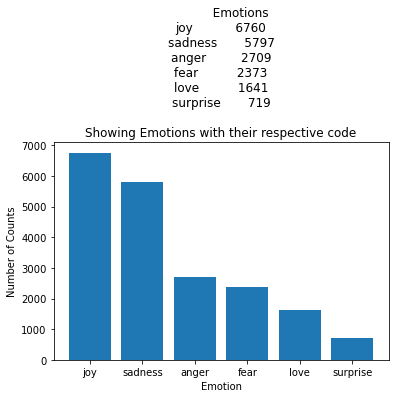

In [5]:
dfN_emotion = dataset.Emotions.value_counts()
df = pd.DataFrame(dfN_emotion)

Code = ['joy','sadness','anger','fear','love','surprise']
plt.bar(Code,dfN_emotion)
plt.xlabel("Emotion")
plt.ylabel("Number of Counts")
plt.title(f"{df}\n\nShowing Emotions with their respective code")
plt.show()

### Creating function for counting different types of symbols and characters in our original text

+ Input : Full length Text and Value to be counted in string form
+ Output : Number of counts

In [6]:
def Counts(Text,Symbol_or_Character):
    Number_of_Counts = 0
    for i in range(len(Text)):
        Text_i = Text[i]
        if Symbol_or_Character in Text_i:
            New_Count = Text_i.count(Symbol_or_Character)
            Number_of_Counts = Number_of_Counts + New_Count
    return Number_of_Counts

In [7]:
Text = dataset['Text']

### Testing function

In [8]:
print(Counts(Text,'and'))
print(Counts(Text,'or'))
print(Counts(Text,'not'))
print(Counts(Text,'no'))

12909
12752
2876
7078


### Counting number of @  '#' ? !

In [9]:
print(Counts(Text,'@'))
print(Counts(Text,'#'))
print(Counts(Text,'?'))
print(Counts(Text,'!'))

print(Counts(Text,'AND'))
print(Counts(Text,'OR'))
print(Counts(Text,'NOT'))
print(Counts(Text,'NO'))

0
0
0
0
0
0
0
0


### Counting the number of characters in the text

In [10]:
dataset['length'] = dataset['Text'].apply(len) 
dataset

,Text,Emotions,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
19994,im having ssa examination tomorrow in the morn...,sadness,191
19995,i constantly worry about their fight against n...,joy,173
19996,i feel its important to share this info for th...,joy,80
19997,i truly feel that if you are passionate enough...,joy,105


In [11]:
dataset['length'].describe()

count    19999.000000
mean        96.671784
std         55.778779
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: length, dtype: float64

### Cleaning the text
+ We are going to remove punctuations and different types of special characters, capital letters or lower case letters from our text as these things will create problem while processing the data

In [12]:
import re
# Importing library to remove stopwords from our text as it will not help to predict our text emotion 
# like all the articles(the, a , an...)
import nltk

# Downloading all the stopwords from the nltk library
nltk.download('stopwords')

# Importing stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Ravi
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming of Text : It will convert all the words in their roots.

+ Example:
- loved as love
- helped as help
- hopes as hope

+ Reason: 
- As after cleaning the text when will create the bag of words model we will create sparse matrix with each column will have all the different words all having different emotions. So in order to optimize the dimension of the sparse matrix we need to apply stemming. If we don't apply the stemming then in sparse matrix we would have one column for present tense and other for the past tense that would be same thing so will create redundants and will make sparse matrix more complex with higher dimension. 

In [13]:
from nltk.stem.porter import PorterStemmer

# Cleaning the texts
# Creating empty list which will contain all the cleaned texts
# We will create a for loop to iterate all the texts of our datasets 
# and for each of these review we will apply the cleaning process
# and after cleaning all the reviews we will add it into created empty list corpus

Cleaned_Text = []
for i in range(len(dataset)):
    # Removing every punctuations and commas except a-z or A-Z by space
    Text = re.sub('[^a-zA-Z]', ' ', dataset['Text'][i])
    
    # Transforming all the capital letters into lower case letters
    Text = Text.lower()
    
    # Splitting the text into different words so that we can apply stemming 
    Text = Text.split()
    
    # Stemming the text
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    
    # Remove 'not' from the stopwords as it can alter the emotion of expression
    all_stopwords.remove('not')
    
    # Applying Stemming on all words except the stopwords
    Text = [ps.stem(word) for word in Text if not word in set(all_stopwords)]
    
    # Joining all the words together seperating with space
    Text = ' '.join(Text)
    
    # Adding the cleaned text to the empty list
    Cleaned_Text.append(Text)

### Cleaned Text

In [14]:
Cleaned_Text

['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi',
 'ive feel littl burden late wasnt sure',
 'ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni',
 'feel confus life teenag jade year old man',
 'petrona year feel petrona perform well made huge profit',
 'feel romant',
 'feel like make suffer see mean someth',
 'feel run divin experi expect type spiritu encount',
 'think easiest time year feel dissatisfi',
 'feel low energi thirsti',
 'immens sympathi gener point possibl proto writer tri find time write corner life sign agent let alon publish contract feel littl preciou',
 'not feel reassur anxieti side',
 'didnt realli feel embarrass',
 'feel pretti pathet time',
 'start feel sentiment doll child began collect vintag barbi doll sixti',
 'feel compromis skeptic valu everi unit work put',
 'feel irrit reject withou

### Creating the Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating instance of Count Vectorizer class
cv = CountVectorizer(max_features = 2000)

# Fit method will take all the words 
# and transform method will put all those in different columns
X = cv.fit_transform(Cleaned_Text).toarray()

# Creating dependent variable
y = dataset.iloc[:, 1].values

In [16]:
y

array(['sadness', 'sadness', 'anger', ..., 'joy', 'joy', 'joy'],
      dtype=object)

#### Label encoding the dependent variables containing emotions

In [17]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
y

array([4, 4, 0, ..., 2, 2, 2])

In [19]:
y1 = dataset.iloc[:, 1].values
y2 = le.fit_transform(y1)
Df1 = pd.DataFrame(y1)
Df1.columns = ['Emotions']
Df1['Emotion Encoded'] = y2
Df1

,Emotions,Emotion Encoded
0,sadness,4
1,sadness,4
2,anger,0
3,love,3
4,anger,0
...,...,...
19994,sadness,4
19995,joy,2
19996,joy,2
19997,joy,2


### Splitting the datasets into training sets and the test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

# Creating Classification model

### Checking performace of different classification model

### 1. Naive Bayes Classification Model

In [21]:
# Importing library for naive_bayes classification
from sklearn.naive_bayes import GaussianNB

# Creating instance
classifier1 = GaussianNB()

# Traning model as Naive_bayes classification model
classifier1.fit(X_train, y_train)

# Predicting test sets results using Model
y_pred = classifier1.predict(X_test)

# Comparing the predicted y and actual y to ensure accuracy of model
Df_1 = (pd.DataFrame(y_pred)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_1.columns = ['Predicted_Emotions']
Df_1['Actual_Emotions'] = (pd.DataFrame(y_test)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_1

,Predicted_Emotions,Actual_Emotions
0,fear,anger
1,sadness,joy
2,love,sadness
3,surprise,sadness
4,anger,sadness
...,...,...
1995,anger,sadness
1996,anger,anger
1997,joy,joy
1998,fear,love


In [22]:
# Importing library for creating Confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n\n',cm)

# Finding R_score
R = accuracy_score(y_test, y_pred)
print('\nR score = ',R)

Confusion Matrix :

 [[106  31   5  64   5  53]
 [  7 108   7  58   9  49]
 [ 60  79 146 226   3 158]
 [  6  15   9  80   1  43]
 [118  92   8 130 114 124]
 [  2   6   7  17   4  50]]

R score =  0.302


### 2. The Decision Tree Classification model

In [24]:
# Importing library for Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

# Creating instance
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Traning model as Decision Tree Classification model
classifier2.fit(X_train, y_train)

# Predicting test sets results using Model
y_pred = classifier2.predict(X_test)

# Comparing the predicted y and actual y to ensure accuracy of model
Df_2 = (pd.DataFrame(y_pred)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_2.columns = ['Predicted_Emotions']
Df_2['Actual_Emotions'] = (pd.DataFrame(y_test)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_2

,Predicted_Emotions,Actual_Emotions
0,anger,anger
1,love,joy
2,joy,sadness
3,sadness,sadness
4,sadness,sadness
...,...,...
1995,sadness,sadness
1996,anger,anger
1997,joy,joy
1998,love,love


In [25]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n\n',cm)

# Finding R_score
R = accuracy_score(y_test, y_pred)
print('\nR score = ',R)

Confusion Matrix :

 [[223   9  10   6  13   3]
 [ 13 190   7   4  10  14]
 [ 25  11 508  64  55   9]
 [  1   3  26 112  11   1]
 [ 28  26  31  13 481   7]
 [  1  11   6   2   2  64]]

R score =  0.789


### 3. The KNN Classification model

In [26]:
# Importing library for K Neighbors Classification
from sklearn.neighbors import KNeighborsClassifier

# Creating instance
classifier3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Traning model as KNN Classification model
classifier3.fit(X_train, y_train)

# Predicting test sets results using Model
y_pred = classifier3.predict(X_test)

# Comparing the predicted y and actual y to ensure accuracy of model
Df_3 = (pd.DataFrame(y_pred)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_3.columns = ['Predicted_Emotions']
Df_3['Actual_Emotions'] = (pd.DataFrame(y_test)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_3

,Predicted_Emotions,Actual_Emotions
0,anger,anger
1,love,joy
2,sadness,sadness
3,sadness,sadness
4,sadness,sadness
...,...,...
1995,joy,sadness
1996,anger,anger
1997,joy,joy
1998,joy,love


In [27]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n\n',cm)

# Finding R_score
R = accuracy_score(y_test, y_pred)
print('\nR score = ',R)

Confusion Matrix :

 [[179  10  30   7  38   0]
 [ 28 117  32   9  37  15]
 [ 54  27 469  42  77   3]
 [ 12   3  47  68  24   0]
 [ 37  18  85  25 421   0]
 [  9  10  22   2  14  29]]

R score =  0.6415


### 4. The Kernel SVM model

In [28]:
# Importing library for Kernel SVM model
from sklearn.svm import SVC

# Creating instance
classifier4 = SVC(kernel = 'rbf', random_state = 0)

# Traning model as KNN Classification model
classifier4.fit(X_train, y_train)

# Predicting test sets results using Model
y_pred = classifier4.predict(X_test)

# Comparing the predicted y and actual y to ensure accuracy of model
Df_4 = (pd.DataFrame(y_pred)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_4.columns = ['Predicted_Emotions']
Df_4['Actual_Emotions'] = (pd.DataFrame(y_test)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_4

,Predicted_Emotions,Actual_Emotions
0,anger,anger
1,joy,joy
2,joy,sadness
3,sadness,sadness
4,sadness,sadness
...,...,...
1995,sadness,sadness
1996,anger,anger
1997,joy,joy
1998,love,love


In [29]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n\n',cm)

# Finding R_score
R = accuracy_score(y_test, y_pred)
print('\nR score = ',R)

Confusion Matrix :

 [[207   5  28   3  21   0]
 [ 12 175  27   3  19   2]
 [ 10   9 617  13  19   4]
 [  3   1  55  85   9   1]
 [ 13   7  22  11 530   3]
 [  1  14  19   0   4  48]]

R score =  0.831


### 5 The Logistic Regression model


In [30]:
# Importing library for the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating instance
classifier5 = LogisticRegression(random_state = 0)

# Traning model as KNN Classification model
classifier5.fit(X_train, y_train)

# Predicting test sets results using Model
y_pred = classifier5.predict(X_test)

# Comparing the predicted y and actual y to ensure accuracy of model
Df_5 = (pd.DataFrame(y_pred)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_5.columns = ['Predicted_Emotions']
Df_5['Actual_Emotions'] = (pd.DataFrame(y_test)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predicted_Emotions,Actual_Emotions
0,anger,anger
1,joy,joy
2,joy,sadness
3,sadness,sadness
4,sadness,sadness
...,...,...
1995,sadness,sadness
1996,anger,anger
1997,joy,joy
1998,love,love


In [31]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n\n',cm)

# Finding R_score
R = accuracy_score(y_test, y_pred)
print('\nR score = ',R)

Confusion Matrix :

 [[230  10  13   0  10   1]
 [  7 196  10   3  11  11]
 [  9   7 613  25  14   4]
 [  2   2  26 118   6   0]
 [ 16   8  18   5 536   3]
 [  0  12   7   1   1  65]]

R score =  0.879


### 6. The Random Forest Classification model

In [32]:
# Importing library for the Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier

# Creating instance
classifier6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Traning model as KNN Classification model
classifier6.fit(X_train, y_train)

# Predicting test sets results using Model
y_pred = classifier6.predict(X_test)

# Comparing the predicted y and actual y to ensure accuracy of model
Df_6 = (pd.DataFrame(y_pred)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_6.columns = ['Predicted_Emotions']
Df_6['Actual_Emotions'] = (pd.DataFrame(y_test)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_6

,Predicted_Emotions,Actual_Emotions
0,anger,anger
1,joy,joy
2,joy,sadness
3,sadness,sadness
4,sadness,sadness
...,...,...
1995,sadness,sadness
1996,anger,anger
1997,joy,joy
1998,love,love


In [33]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n\n',cm)

# Finding R_score
R = accuracy_score(y_test, y_pred)
print('\nR score = ',R)

Confusion Matrix :

 [[231   9   8   3  10   3]
 [  8 204   3   2   9  12]
 [ 18  10 558  46  30  10]
 [  3   4  34 111   2   0]
 [ 32  21  20  17 488   8]
 [  0   8   3   2   0  73]]

R score =  0.8325


### 7. The SVM Classification model

In [34]:
# Importing library for the SVM model
from sklearn.svm import SVC

# Creating instance
classifier7 = SVC(kernel = 'linear', random_state = 0)

# Traning model as KNN Classification model
classifier7.fit(X_train, y_train)

# Predicting test sets results using Model
y_pred = classifier7.predict(X_test)

# Comparing the predicted y and actual y to ensure accuracy of model
Df_7 = (pd.DataFrame(y_pred)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_7.columns = ['Predicted_Emotions']
Df_7['Actual_Emotions'] = (pd.DataFrame(y_test)).replace({2:'joy',3:'love',4:'sadness',0:'anger',1:'fear',5:'surprise'})
Df_7

,Predicted_Emotions,Actual_Emotions
0,anger,anger
1,joy,joy
2,joy,sadness
3,sadness,sadness
4,sadness,sadness
...,...,...
1995,sadness,sadness
1996,anger,anger
1997,joy,joy
1998,love,love


In [35]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n\n',cm)

# Finding R_score
R = accuracy_score(y_test, y_pred)
print('\nR score = ',R)

Confusion Matrix :

 [[232  10  13   0   8   1]
 [ 13 183   9   2  14  17]
 [ 15  13 594  30  15   5]
 [  5   2  25 119   3   0]
 [ 18  15  18  11 518   6]
 [  0   9   7   1   1  68]]

R score =  0.857


### Comparisional analysis of different classification models

+ Predicting emotion for single paragraph of text 

In [36]:
def Prediction_Single_Text(Text):
    # Removing every punctuations and commas except a-z or A-Z by space
    Text = re.sub('[^a-zA-Z]', ' ', Text)
    
    # Transforming all the capital letters into lower case letters
    Text = Text.lower()
    
    # Splitting the text into different words so that we can apply stemming 
    Text = Text.split()
    
    # Stemming the text
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    
    # Remove 'not' from the stopwords as it can alter the emotion of expression
    all_stopwords.remove('not')
    
    # Applying Stemming on all words except the stopwords
    Text = [ps.stem(word) for word in Text if not word in set(all_stopwords)]
    
    # Joining all the words together seperating with space
    Text = ' '.join(Text)
    
    Cleaned_Text = [Text]
    new_X_test = cv.transform(Cleaned_Text).toarray()
    new_y_pred1 = classifier1.predict(new_X_test)
    new_y_pred2 = classifier2.predict(new_X_test)
    new_y_pred3 = classifier3.predict(new_X_test)
    new_y_pred4 = classifier4.predict(new_X_test)
    new_y_pred5 = classifier5.predict(new_X_test)
    new_y_pred6 = classifier6.predict(new_X_test)
    new_y_pred7 = classifier7.predict(new_X_test)
    print("Predicted value by Naive Bayes Classification Model: ",new_y_pred1)
    print("Predicted value by Decision Tree Classification Model: ",new_y_pred2)
    print("Predicted value by KNN Classification Model: ",new_y_pred3)
    print("Predicted value by Kernel SVM Classification Model: ",new_y_pred4)
    print("Predicted value by Logistic Regression Classification Model: ",new_y_pred5)
    print("Predicted value by Random Forest Classification Model: ",new_y_pred6)
    print("Predicted value by SVM Classification Model: ",new_y_pred7)

### Predicting sadness

In [37]:
Text = 'I lost my purse I have no money for travelling.'
Prediction_Single_Text(Text)

Predicted value by Naive Bayes Classification Model:  [5]
Predicted value by Decision Tree Classification Model:  [4]
Predicted value by KNN Classification Model:  [1]
Predicted value by Kernel SVM Classification Model:  [4]
Predicted value by Logistic Regression Classification Model:  [4]
Predicted value by Random Forest Classification Model:  [4]
Predicted value by SVM Classification Model:  [4]


### Predicting Enjoy

In [38]:
Text = 'I enjoyed a lot.'
Prediction_Single_Text(Text)

Predicted value by Naive Bayes Classification Model:  [5]
Predicted value by Decision Tree Classification Model:  [4]
Predicted value by KNN Classification Model:  [0]
Predicted value by Kernel SVM Classification Model:  [0]
Predicted value by Logistic Regression Classification Model:  [2]
Predicted value by Random Forest Classification Model:  [1]
Predicted value by SVM Classification Model:  [2]


### Finalising Model: Logistic Regression Classification Model

+ Since Accuracies of all models are as:
    - Naive Bayes Classification Model             : 30 %
    - The Decision Tree Classification model       : 79 % 
    - The KNN Classification model                 : 64 %
    - The Kernel SVM Classification model          : 83 %
    - The Logistic Regression Classification model : 88 %
    - The Random Forest Classification model       : 83 %
    - The SVM Classification model                 : 85 %

In [39]:
def Prediction_Final_Model(Text):
    # Removing every punctuations and commas except a-z or A-Z by space
    Text = re.sub('[^a-zA-Z]', ' ', Text)
    
    # Transforming all the capital letters into lower case letters
    Text = Text.lower()
    
    # Splitting the text into different words so that we can apply stemming 
    Text = Text.split()
    
    # Stemming the text
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    
    # Remove 'not' from the stopwords as it can alter the emotion of expression
    all_stopwords.remove('not')
    
    # Applying Stemming on all words except the stopwords
    Text = [ps.stem(word) for word in Text if not word in set(all_stopwords)]
    
    # Joining all the words together seperating with space
    Text = ' '.join(Text)
    
    Cleaned_Text = [Text]
    new_X_test = cv.transform(Cleaned_Text).toarray()
    new_y_pred = classifier5.predict(new_X_test)
    new_y_pred_code = new_y_pred[0]
    if new_y_pred==0:
        print("Predicted value by Logistic Regression Classification Model: Anger")
    elif new_y_pred==1:
        print("Predicted value by Logistic Regression Classification Model: fear")
    elif new_y_pred==2:
        print("Predicted value by Logistic Regression Classification Model: joy")
    elif new_y_pred==3:
        print("Predicted value by Logistic Regression Classification Model: love")
    elif new_y_pred==4:
        print("Predicted value by Logistic Regression Classification Model: sadness")
    else:
        print("Predicted value by Logistic Regression Classification Model: surprise")

### Checking Model Accuracy

In [40]:
Text1 = 'I hate you'
Prediction_Final_Model(Text1)

Predicted value by Logistic Regression Classification Model: Anger


In [41]:
Text2 = 'I love you'
Prediction_Final_Model(Text2)

Predicted value by Logistic Regression Classification Model: love


In [42]:
Text3 = 'I am angry with you'
Prediction_Final_Model(Text3)

Predicted value by Logistic Regression Classification Model: Anger


### Model is working good-----------------------------------------------------------------------------